In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [278]:
# Read csv data into data frame
original_dataframe = pd.read_csv("../Case_PRB.csv")

# Sort the complete dataframe on the date column
original_dataframe.sort_values('date')
original_dataframe.head(50000)

C:\Users\Picasse Stage\AppData\Local\Temp\ipykernel_9832\2075149817.py:2: DtypeWarning: Columns (1,24) have mixed types. Specify dtype option on import or set low_memory=False.
  original_dataframe = pd.read_csv("../Case_PRB.csv")


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49663,NaN,NaN,International,2020-10-08,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49664,NaN,NaN,International,2020-10-09,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49665,NaN,NaN,International,2020-10-10,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49666,NaN,NaN,International,2020-10-11,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [279]:
# All the columns that are accessible in the dataframe.
original_dataframe.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [280]:
original_dataframe_cont = original_dataframe[['date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index']]

original_dataframe_cat = original_dataframe[['iso_code', 'continent', 'location']]

In [281]:
# Create a new dataframe to categorize the string values.
categorized_dataframe = pd.get_dummies(original_dataframe, columns = original_dataframe_cat.columns)
categorized_dataframe.head()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,location_Uruguay,location_Uzbekistan,location_Vatican,location_Venezuela,location_Vietnam,location_Western Sahara,location_World,location_Yemen,location_Zambia,location_Zimbabwe
0,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,18.733,18.733,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,37.465,18.733,2.676,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,...,0,0,0,0,0,0,0,0,0,0


In [282]:
# Combine the columns female_smokers and male_smokers together in the column smokers.

categorized_dataframe.dropna(subset=['extreme_poverty', 'total_deaths'], inplace=True)

C:\Users\Picasse Stage\AppData\Local\Temp\ipykernel_9832\315259342.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(x_train, y_train)


       extreme_poverty
37148              0.5
32169              0.5
39387             38.0
31149              0.5
32942             13.4
...                ...
22586              0.2
32779             13.4
17996             67.1
20039              0.7
5371               0.2

[21542 rows x 1 columns]


InvalidIndexError: (slice(None, None, None), None)

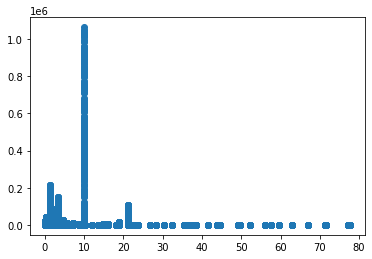

In [283]:
# Get the
X = categorized_dataframe[['extreme_poverty']]
Y = categorized_dataframe[['total_deaths']]

# Split the data into test and training data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

reg = RandomForestRegressor(n_estimators=10, random_state=0)
reg.fit(x_train, y_train)

print(x_train)
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train))
plt.show()